
# Dataset Glossary (Column-wise)
`Customer ID`:A unique identifier assigned to each individual customer, facilitating tracking and analysis of their shopping behavior over time.

`Age`: The age of the customer, providing demographic information for segmentation and targeted marketing strategies.

`Gender`: The gender identification of the customer, a key demographic variable influencing product preferences and purchasing patterns.

Item Purchased: The specific product or item selected by the customer during the transaction.

`Category`: The broad classification or group to which the purchased item belongs (e.g., clothing, electronics, groceries).

`Purchase Amount (USD)`: The monetary value of the transaction, denoted in United States Dollars (USD), indicates the cost of the purchased item(s).

`Location`: The geographical location where the purchase was made, offering insights into regional preferences and market trends.

`Size`: The size specification (if applicable) of the purchased item, relevant for apparel, footwear, and certain consumer goods.

`Color`: The color variant or choice associated with the purchased item, influencing customer preferences and product availability.

`Season`: The seasonal relevance of the purchased item (e.g., spring, summer, fall, winter), impacting inventory management and marketing strategies.

`Review Rating`: A numerical or qualitative assessment provided by the customer regarding their satisfaction with the purchased item.

`Subscription Status`: Indicates whether the customer has opted for a subscription service, offering insights into their level of loyalty and potential for recurring revenue.

`Shipping Type`: Specifies the method used to deliver the purchased item (e.g., standard shipping, express delivery), influencing delivery times and costs.

`Discount Applied`: Indicates if any promotional discounts were applied to the purchase, shedding light on price sensitivity and promotion effectiveness.

`Promo Code Used`: Notes whether a promotional code or coupon was utilized during the transaction, aiding in the evaluation of marketing campaign success.

`Previous Purchases`: Provides information on the number or frequency of prior purchases made by the customer, contributing to customer segmentation and retention strategies.

`Payment Method`: Specifies the mode of payment employed by the customer (e.g., credit card, cash), offering insights into preferred payment options.

`Frequency of Purchases`: Indicates how often the customer engages in purchasing activities, a critical metric for assessing customer loyalty and lifetime value.

# Framing

- There are two sets of data. Which one are we using? They are almost identical. I 
- What's our goal? Identifying high spending customer? Most sold items? Satisfaction Level? Increase the subscription? What is this segmenation is for?
- Is Previous Purchase the number of items they had purchased?
- The business has the subscription model. 
- Maybe we can use RFM model.


In [215]:
import pandas as pd
import seaborn as sns
import numpy as np

In [169]:
df = pd.read_csv('shopping_behavior_updated.csv')

In [171]:
df.shape

(3900, 18)

In [173]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [175]:
df.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [179]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [181]:
df.select_dtypes(object)

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
0,Male,Blouse,Clothing,Kentucky,L,Gray,Winter,Yes,Express,Yes,Yes,Venmo,Fortnightly
1,Male,Sweater,Clothing,Maine,L,Maroon,Winter,Yes,Express,Yes,Yes,Cash,Fortnightly
2,Male,Jeans,Clothing,Massachusetts,S,Maroon,Spring,Yes,Free Shipping,Yes,Yes,Credit Card,Weekly
3,Male,Sandals,Footwear,Rhode Island,M,Maroon,Spring,Yes,Next Day Air,Yes,Yes,PayPal,Weekly
4,Male,Blouse,Clothing,Oregon,M,Turquoise,Spring,Yes,Free Shipping,Yes,Yes,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,Female,Hoodie,Clothing,Virginia,L,Turquoise,Summer,No,2-Day Shipping,No,No,Venmo,Weekly
3896,Female,Backpack,Accessories,Iowa,L,White,Spring,No,Store Pickup,No,No,Bank Transfer,Bi-Weekly
3897,Female,Belt,Accessories,New Jersey,L,Green,Spring,No,Standard,No,No,Venmo,Quarterly
3898,Female,Shoes,Footwear,Minnesota,S,Brown,Summer,No,Express,No,No,Venmo,Weekly


<Axes: ylabel='Frequency'>

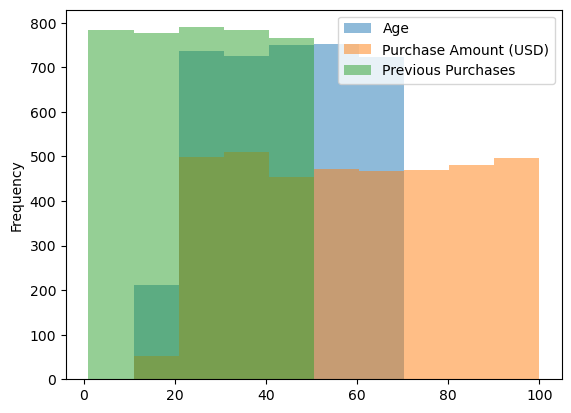

In [225]:
df.select_dtypes([int]).plot(kind='hist', alpha=0.5)

They are pretty close to uniform distribution...

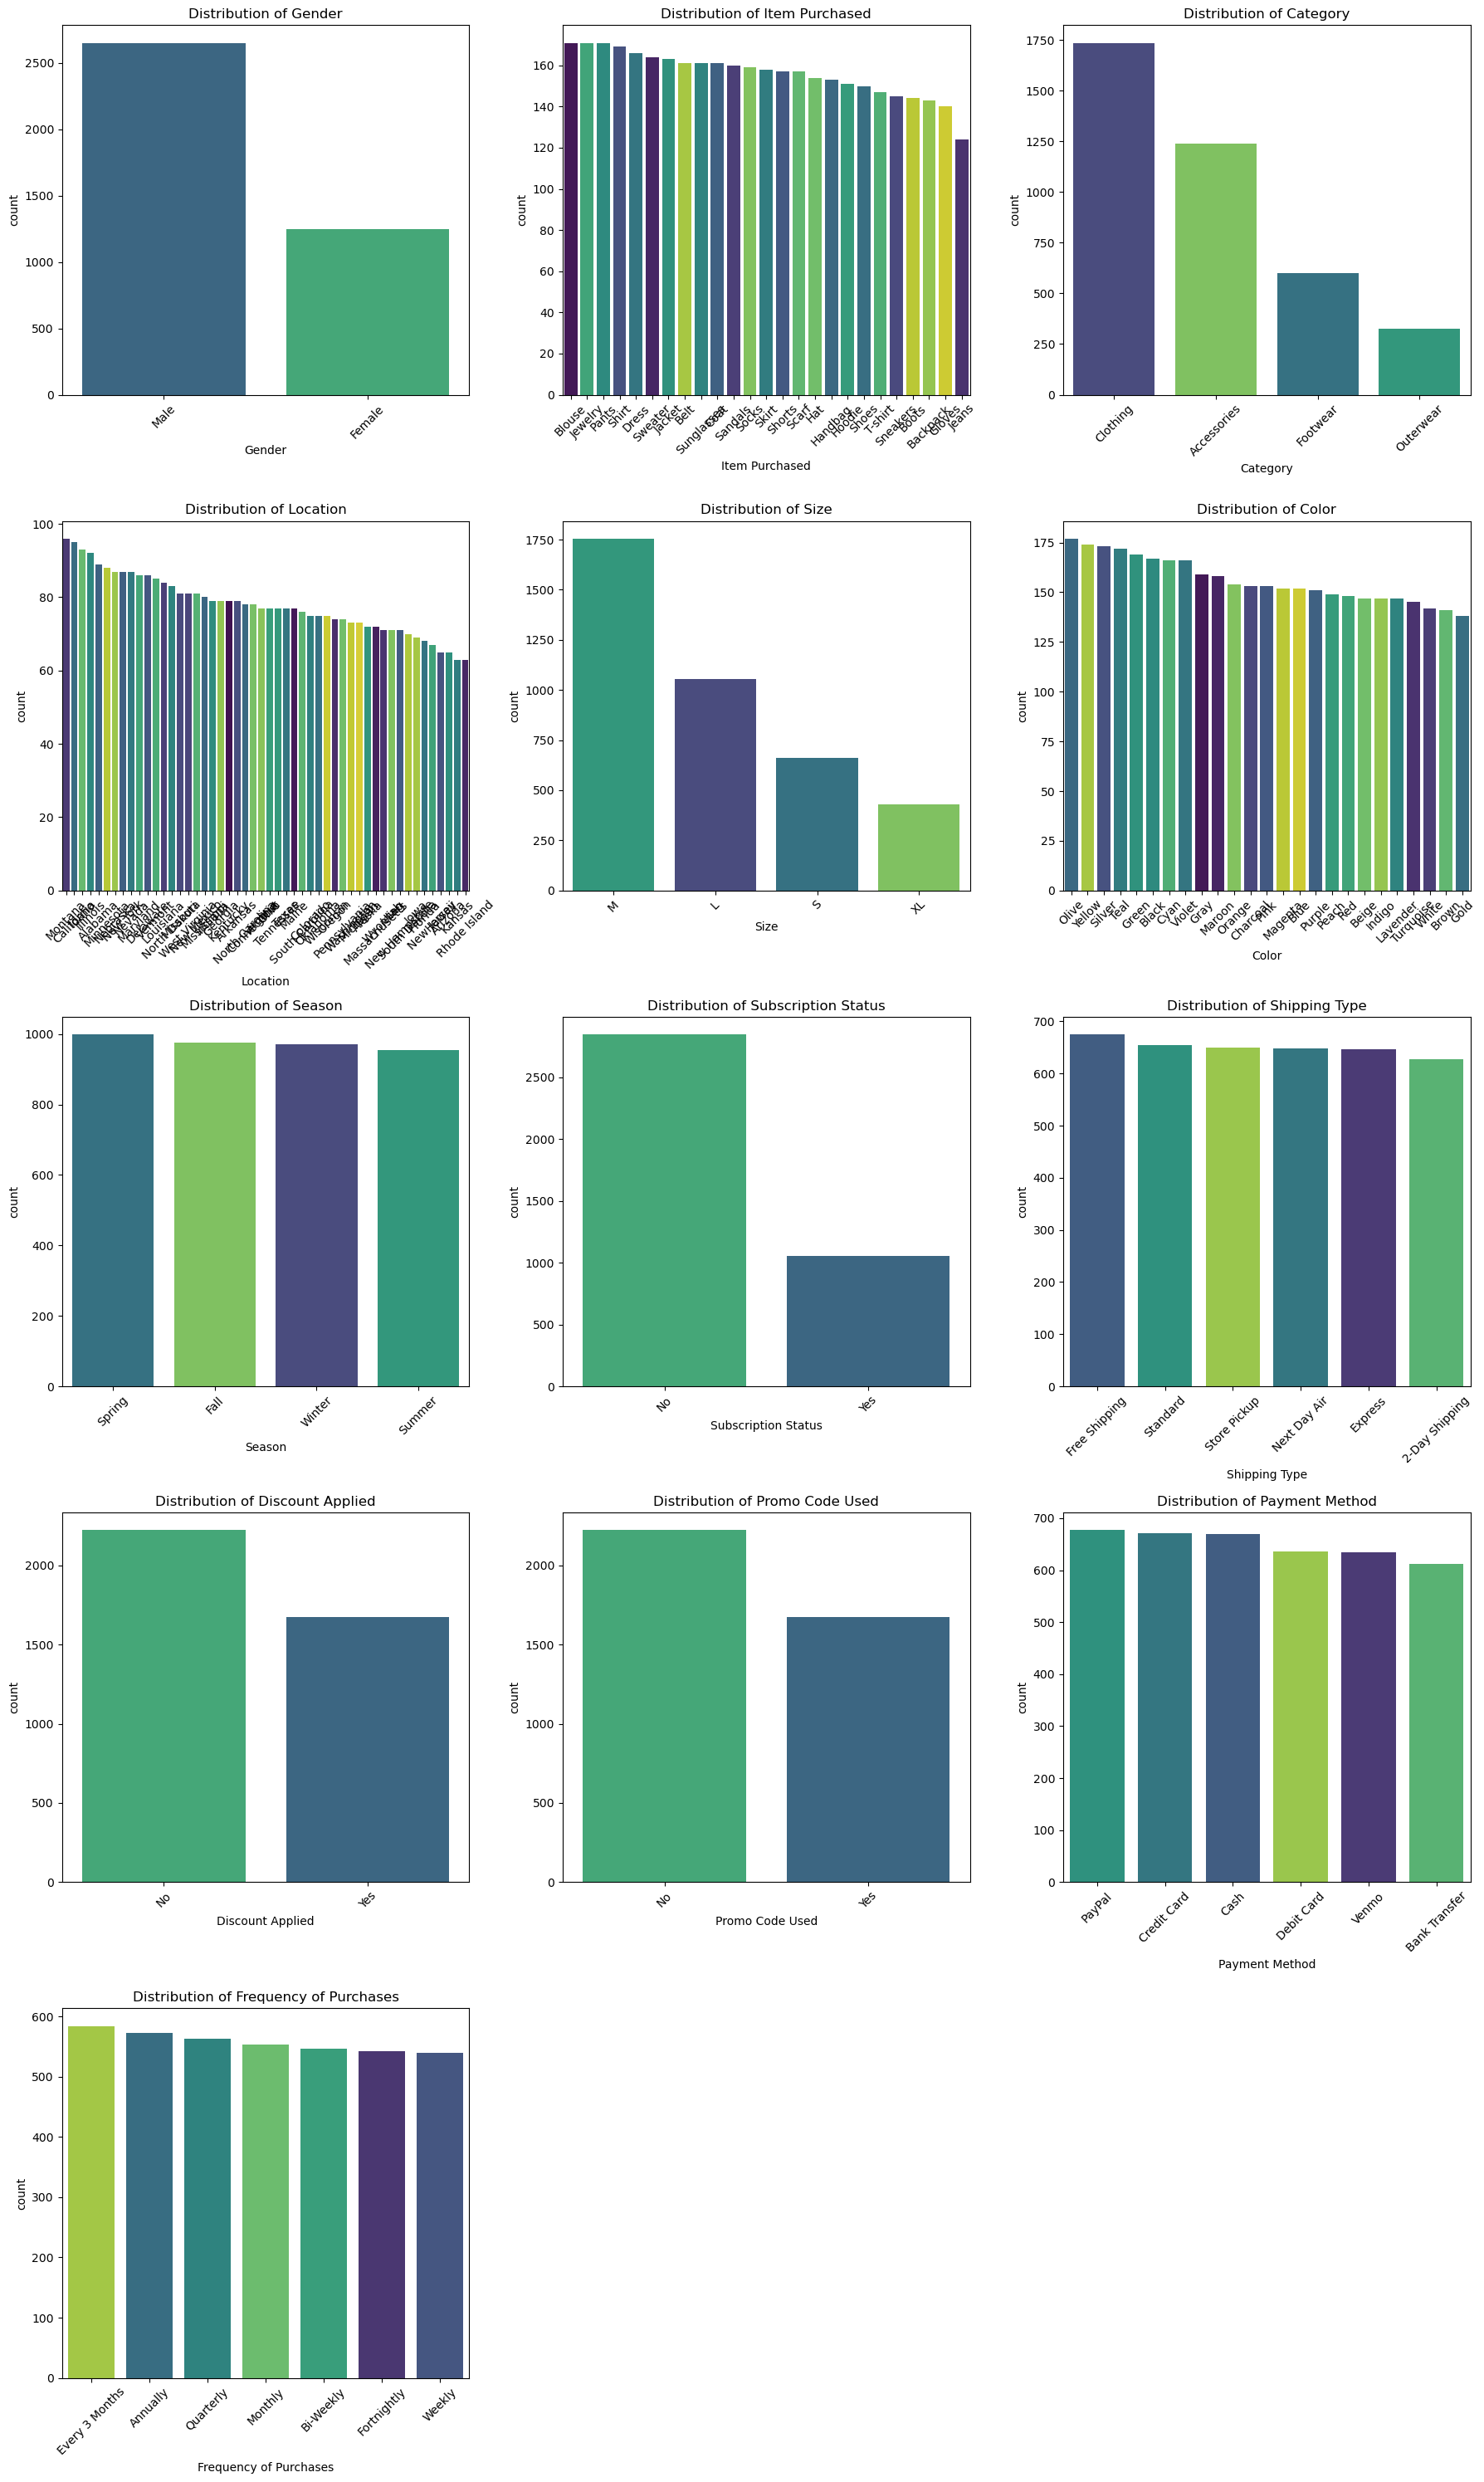

In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

def plot_categorical_grid(df, rows=5, cols=3, palette='viridis'):
    """
    Plots multiple countplots for categorical variables in a 5x3 grid.

    Parameters:
        df (pd.DataFrame): The dataframe containing categorical variables.
        rows (int): Number of rows in the subplot grid (default=5).
        cols (int): Number of columns in the subplot grid (default=3).
        palette (str): Seaborn color palette.
    """
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    num_plots = len(categorical_columns)
    
    # Adjust grid size based on number of categorical variables
    total_plots = min(num_plots, rows * cols)
    grid_rows = math.ceil(total_plots / cols)
    
    fig, axes = plt.subplots(grid_rows, cols, figsize=(18, 6 * grid_rows))
    axes = axes.flatten()  # Flatten axes array for easy iteration
    
    for i, column in enumerate(categorical_columns[:total_plots]):
        sns.countplot(x=df[column], hue=df[column], order=df[column].value_counts().index,
                      palette=palette, legend=False, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

    # Hide unused subplots if there are fewer than rows * cols
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])  # Remove extra axes

    plt.tight_layout()
    plt.show()

# Example Usage:
plot_categorical_grid(df)  # Normal count plot



there are a lot more male customers. The business might be in male dominant section.

# Drop Customer ID Field

In [187]:
df.drop(['Customer ID'],axis=1,inplace=True)

Potential Aspect

- Location
- Product Types
- Frequency
- Transaction Method
- Demographic

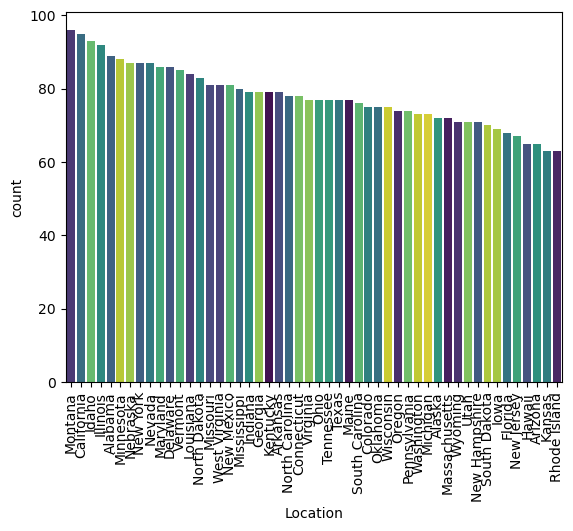

In [190]:
fig = plt.figure()

sns.countplot(x=df['Location'], hue=df['Location'], order=df['Location'].value_counts().index,
              palette='viridis', legend=False)

plt.tick_params(axis='x', rotation=90)
plt.show()

Why is this service so popular in Montana?

Montana's population is 1.1MM
California's population is 39.4MM... It is disproportionate. Maybe it's an outdoor brand? That might explain why most customers are male. 


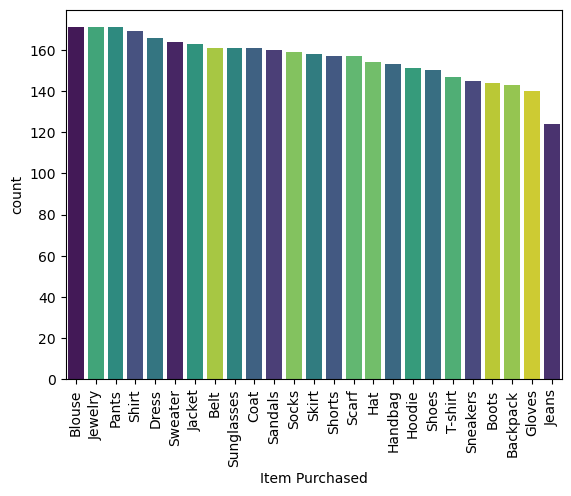

In [193]:
fig = plt.figure()

column = 'Item Purchased'

sns.countplot(x=df[column], hue=df[column], order=df[column].value_counts().index,
              palette='viridis', legend=False)

plt.tick_params(axis='x', rotation=90)
plt.show()

<Axes: xlabel='Previous Purchases', ylabel='Purchase Amount (USD)'>

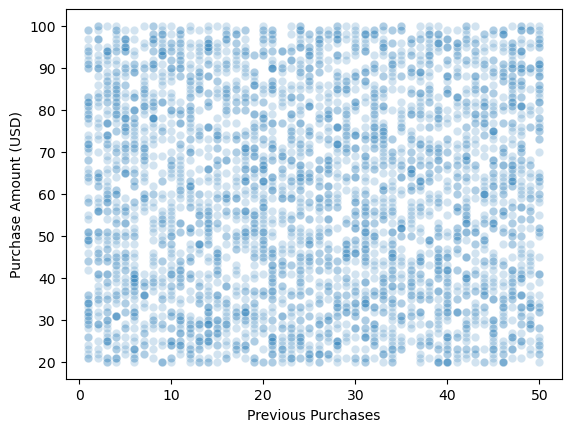

In [195]:
sns.scatterplot(x=df['Previous Purchases'], y=df['Purchase Amount (USD)'], alpha=0.2)

`Previous Purchases` and `Purchase Amount` seem unrelated.

<Axes: xlabel='Review Rating', ylabel='Previous Purchases'>

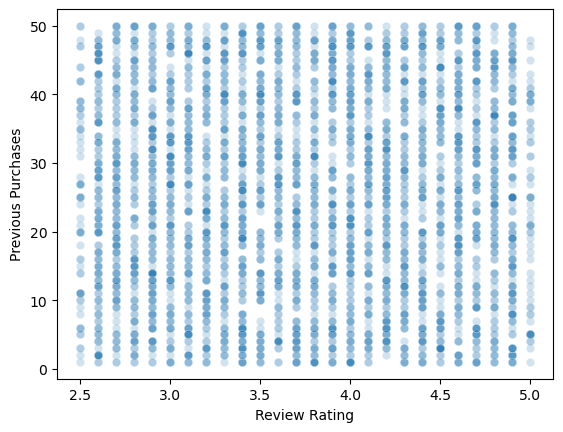

In [198]:
sns.scatterplot(x=df['Review Rating'], y=df['Previous Purchases'], alpha=0.2)

Given the available data, here are several viable **market segmentation strategies** that can help tailor marketing efforts, improve customer experience, and drive sales:

---

### **1. Demographic Segmentation**
   - **Age**: Grouping customers by age brackets (e.g., 18-24, 25-34, 35-44) can help in targeting products relevant to different life stages.
   - **Gender**: Understanding purchasing behavior differences between genders allows for personalized product recommendations and promotions.
   - **Subscription Status**: Identifying subscribers vs. non-subscribers helps create tailored retention and upselling strategies.

**Use Case**: A clothing retailer can promote trendy outfits to younger customers while offering classic styles to older demographics.

---

### **2. Behavioral Segmentation**
   - **Previous Purchases**: Customers who frequently buy high-value products might be targeted for exclusive VIP offers.
   - **Frequency of Purchases**: Identifying habitual buyers vs. occasional shoppers helps in designing loyalty programs.
   - **Review Rating**: Customers with high ratings can be incentivized to leave more reviews, while those with low ratings can receive personalized support.

**Use Case**: A beauty brand can send special discounts to repeat customers while offering trial samples to first-time buyers.

---

### **3. Geographic Segmentation**
   - **Location**: Identifying purchasing trends based on geographical regions helps in stocking relevant products and targeting ads.
   - **Season**: Aligning product recommendations and promotions with regional seasons can boost relevance.

**Use Case**: A retailer can market winter coats to customers in colder states while promoting summer dresses in warmer areas.

---

### **4. Psychographic Segmentation**
   - **Discount Applied & Promo Code Used**: Customers who frequently use discounts may respond better to price-based promotions, while those who don’t may value exclusivity.
   - **Payment Method**: Customers who prefer digital wallets may be targeted with cashback offers, while those using cash may receive reminders for online payment options.

**Use Case**: A premium electronics store can offer exclusive early-access sales to full-price customers while sending discount coupons to price-sensitive shoppers.

---

### **5. Product-Based Segmentation**
   - **Item Purchased & Category**: Customers can be segmented by their favorite product types (e.g., tech enthusiasts, fashion shoppers, grocery buyers).
   - **Size & Color**: This helps in personalizing recommendations for repeat purchases in the preferred style.
   - **Shipping Type**: Express shipping users might value convenience over price, making them ideal for premium service upselling.

**Use Case**: A sports brand can send new sneaker releases to customers who frequently buy athletic shoes in specific sizes and colors.

---

### **6. Customer Value Segmentation**
   - **Purchase Amount (USD)**: High spenders can be targeted with premium offers and loyalty rewards, while budget-conscious shoppers might receive discount-based promotions.
   - **Subscription Status**: Subscription customers can be offered exclusive perks, while non-subscribers can be nudged with free trials.

**Use Case**: A subscription-based streaming service can offer early access to content for premium members while incentivizing non-subscribers with limited-time free access.

---

### **7. Lifecycle & Retention-Based Segmentation**
   - **Previous Purchases & Frequency of Purchases**: Identifies first-time buyers, repeat customers, and lapsed customers for targeted engagement.
   - **Review Rating**: High-rating customers can be encouraged to refer friends, while dissatisfied customers can receive personalized resolutions.

**Use Case**: An e-commerce platform can send personalized win-back emails to customers who haven’t made a purchase in 90 days.

---

### **Multi-Layered Segmentation (Advanced)**
For more **refined** targeting, combining multiple factors can enhance marketing precision:
   - **Young, frequent buyers who use promo codes** → Ideal for student discounts and limited-time deals.
   - **Older, high-value customers with a subscription** → Target with premium product bundles and loyalty perks.
   - **Customers who only buy winter products in December** → Seasonal re-engagement campaigns.

**Use Case**: A fashion retailer can push summer wear ads to frequent shoppers who previously bought summer items, ensuring seasonal relevance.

---

### **Final Thoughts**
By applying these **segmentation strategies**, businesses can improve **customer engagement, retention, and sales performance** by delivering highly relevant marketing and product recommendations. Would you like help in analyzing your data to identify key customer segments? 🚀